<a href="https://colab.research.google.com/github/njorogeinc/data_science/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab

In [ ]:
df = pd.read_csv('stores.csv')
df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
df.tail()

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [ ]:
df.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [ ]:
df.index

RangeIndex(start=0, stop=54, step=1)

In [ ]:
df.columns

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')

In [ ]:
df.cluster.unique()

array([13,  8,  9,  4,  6, 15,  7,  3, 12, 16,  1, 10,  2,  5, 11, 14, 17])

In [ ]:
df.type.unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [ ]:
df.set_index('store_nbr', inplace=True)

In [ ]:
df.head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
data = pd.read_csv('train.csv')
data.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0


In [ ]:
data.describe()

,id,store_nbr,sales,onpromotion
count,981556.00000,981556.000000,981556.000000,981556.000000
mean,490777.50000,27.499236,239.907954,0.050088
std,283350.95475,15.582921,797.244409,1.333330
min,0.00000,1.000000,0.000000,0.000000
25%,245388.75000,14.000000,0.000000,0.000000
50%,490777.50000,27.000000,1.000000,0.000000
75%,736166.25000,41.000000,116.499750,0.000000
max,981555.00000,54.000000,46271.000000,188.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981556 entries, 0 to 981555
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           981556 non-null  int64  
 1   date         981556 non-null  object 
 2   store_nbr    981556 non-null  int64  
 3   family       981556 non-null  object 
 4   sales        981556 non-null  float64
 5   onpromotion  981556 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 44.9+ MB


In [ ]:
data.set_index('date', inplace=True)
data.head(2)

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0


In [ ]:
data['date'] = np.arange(len(data.index))
data.head(2)

,id,store_nbr,family,sales,onpromotion,date
date,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,0
2013-01-01,1,1,BABY CARE,0.0,0,1


In [ ]:
del data['id']

data.head(2)

,store_nbr,family,sales,onpromotion,date
date,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,0
2013-01-01,1,BABY CARE,0.0,0,1


In [ ]:
data.columns

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'date'], dtype='object')

In [ ]:
data.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [ ]:
data.describe

<bound method NDFrame.describe of             store_nbr      family    sales  onpromotion    date
date                                                           
2013-01-01          1  AUTOMOTIVE     0.00            0       0
2013-01-01          1   BABY CARE     0.00            0       1
2013-01-01          1      BEAUTY     0.00            0       2
2013-01-01          1   BEVERAGES     0.00            0       3
2013-01-01          1       BOOKS     0.00            0       4
...               ...         ...      ...          ...     ...
2014-07-06         49     SEAFOOD    89.44            0  981551
2014-07-06          5  AUTOMOTIVE    10.00            0  981552
2014-07-06          5   BABY CARE     0.00            0  981553
2014-07-06          5      BEAUTY     7.00            0  981554
2014-07-06          5   BEVERAGES  3401.00            4  981555

[981556 rows x 5 columns]>

In [ ]:
data.onpromotion.unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62])

In [ ]:
df.head(2)

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13


In [ ]:
data.head(2)

,store_nbr,family,sales,onpromotion,date
date,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,0
2013-01-01,1,BABY CARE,0.0,0,1


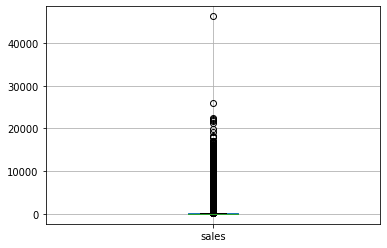

In [ ]:
data.boxplot('sales')

In [ ]:
x = data['date']
y = data['sales']
plt.bar(x, y)
plt.legend()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fea352c2290> (for post_execute):


KeyboardInterrupt: ignored

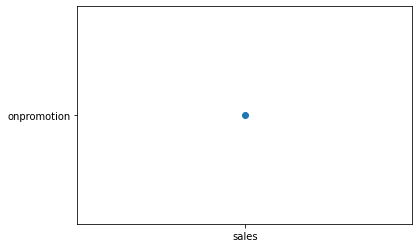

In [ ]:
plt.scatter('sales','onpromotion')
plt.show()

In [ ]:
data['family'].corr(data['sales'])